# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


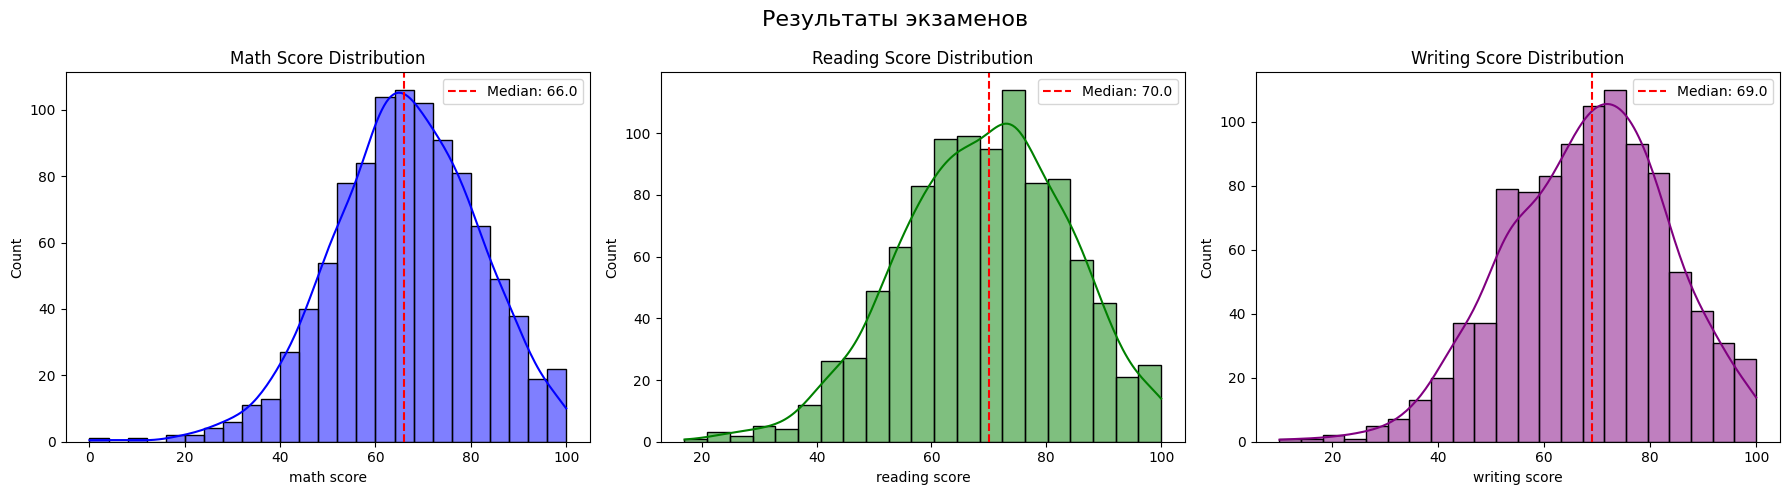

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('StudentsPerformance.csv')

math_median = df['math score'].median()
reading_median = df['reading score'].median()
writing_median = df['writing score'].median()

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.axvline(math_median, color='red', linestyle='--', label=f'Median: {math_median}')
plt.title('Math Score Distribution')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.axvline(reading_median, color='red', linestyle='--', label=f'Median: {reading_median}')
plt.title('Reading Score Distribution')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='purple')
plt.axvline(writing_median, color='red', linestyle='--', label=f'Median: {writing_median}')
plt.title('Writing Score Distribution')
plt.legend()

plt.suptitle('Результаты экзаменов', fontsize=16)

plt.tight_layout()
plt.show()


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


Уровни образования родителей и количество строк для каждого уровня:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


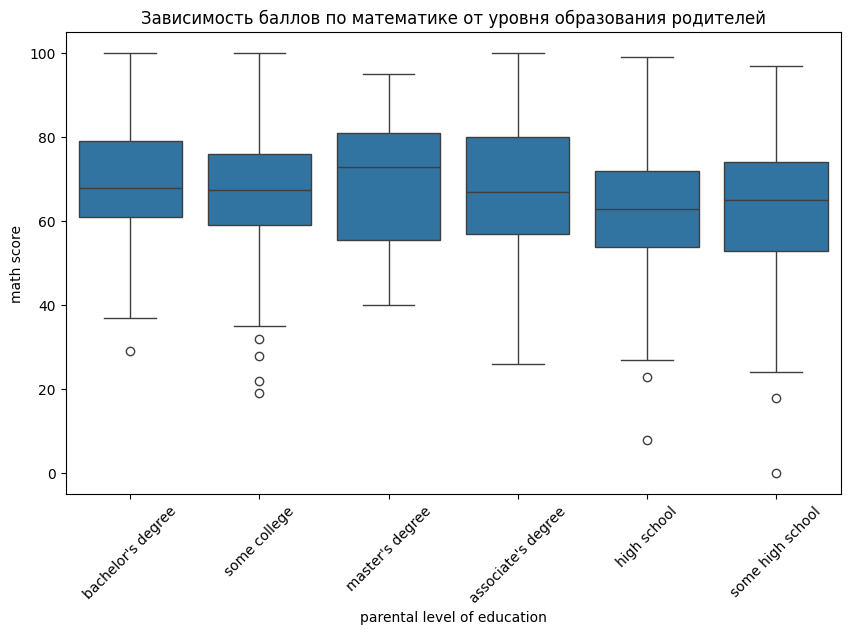

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

parental_education_levels = df['parental level of education'].value_counts()
print("Уровни образования родителей и количество строк для каждого уровня:")
print(parental_education_levels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Зависимость баллов по математике от уровня образования родителей')
plt.show()


#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')

high_achieving_females = df[(df['gender'] == 'female') &
                            (df['math score'] > 90) &
                            (df['reading score'] > 90) &
                            (df['writing score'] > 90)]

num_high_achieving_females = high_achieving_females.shape[0]
print(f"Число студенток, набравших больше 90 баллов по всем предметам: {num_high_achieving_females}")


Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')

stats_by_gender = df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
})

print("Сравнение баллов у студентов разного пола:")
print(stats_by_gender)


Сравнение баллов у студентов разного пола:
       math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [ ]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')

df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

grouped_data = df.groupby(['gender', 'lunch', 'test preparation course']).agg({
    'average score': 'mean'
}).reset_index()

print("Средний балл в зависимости от пола, обеда и подготовки к тесту:")
print(grouped_data)


Средний балл в зависимости от пола, обеда и подготовки к тесту:
   gender         lunch test preparation course  average score
0  female  free/reduced               completed      69.528571
1  female  free/reduced                    none      59.501401
2  female      standard               completed      77.479532
3  female      standard                    none      70.961240
4    male  free/reduced               completed      65.721311
5    male  free/reduced                    none      58.323810
6    male      standard               completed      73.513274
7    male      standard                    none      65.486043


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

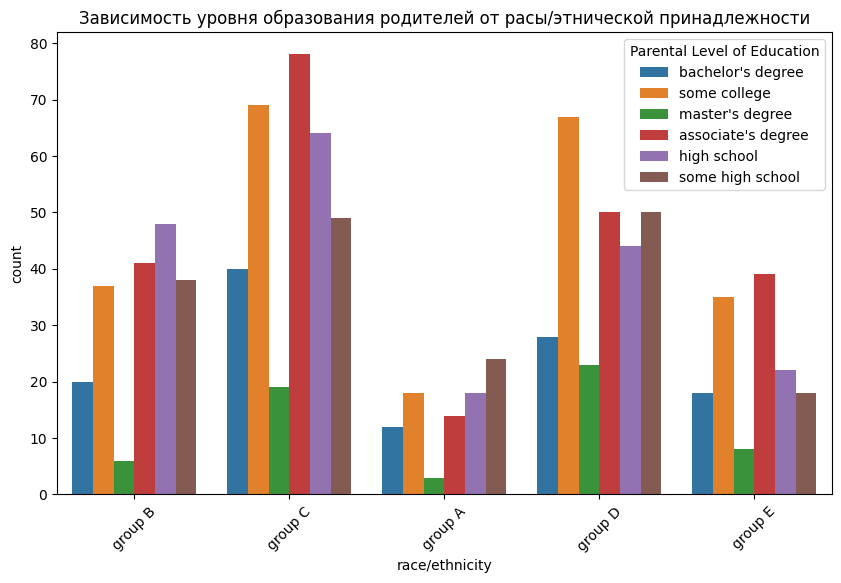

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

plt.figure(figsize=(10, 6))
sns.countplot(x='race/ethnicity', hue='parental level of education', data=df)
plt.title('Зависимость уровня образования родителей от расы/этнической принадлежности')
plt.xticks(rotation=45)
plt.legend(title='Parental Level of Education')
plt.show()


#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

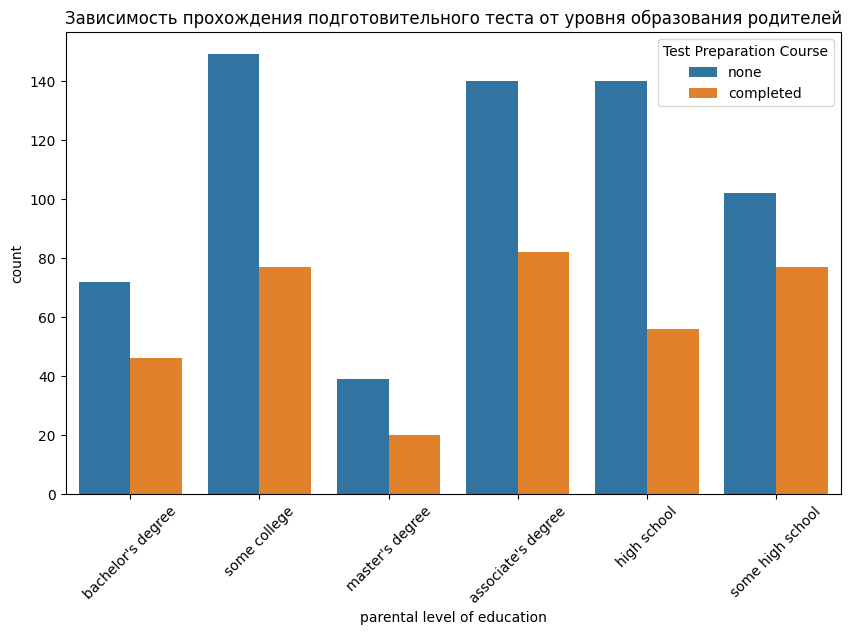

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', hue='test preparation course', data=df)
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xticks(rotation=45)
plt.legend(title='Test Preparation Course')
plt.show()


#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

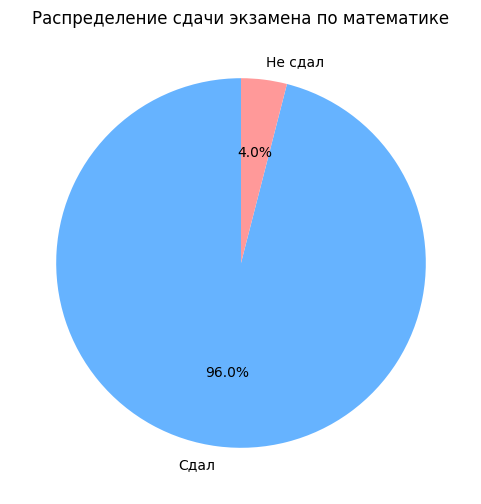

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

df['math_passed'] = df['math score'].apply(lambda x: 'Сдал' if x >= 40 else 'Не сдал')

pass_counts = df['math_passed'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Распределение сдачи экзамена по математике')
plt.show()


#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

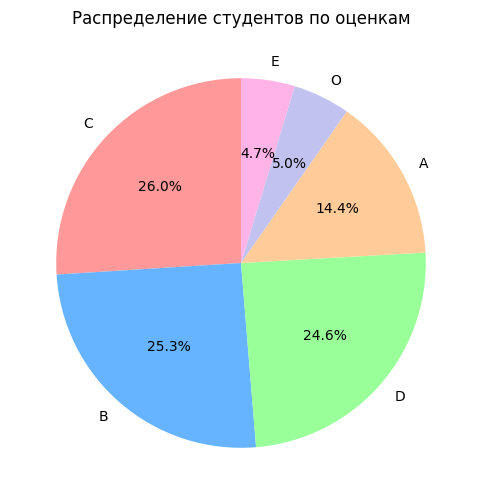

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif row['average score'] <= 40:
        return 'E'
    elif row['average score'] <= 60:
        return 'D'
    elif row['average score'] <= 70:
        return 'C'
    elif row['average score'] <= 80:
        return 'B'
    elif row['average score'] <= 90:
        return 'A'
    else:
        return 'O'

df['grade'] = df.apply(assign_grade, axis=1)

grade_counts = df['grade'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Распределение студентов по оценкам')
plt.show()


#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

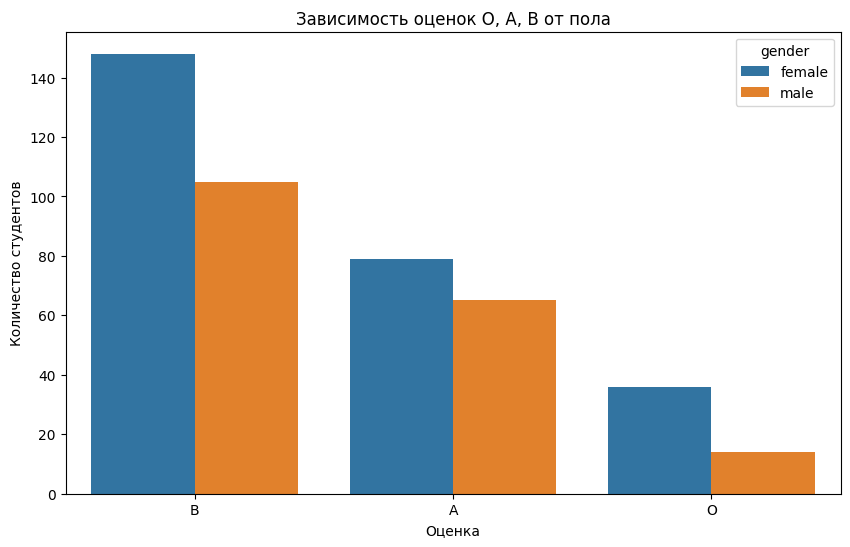

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif row['average score'] <= 40:
        return 'E'
    elif row['average score'] <= 60:
        return 'D'
    elif row['average score'] <= 70:
        return 'C'
    elif row['average score'] <= 80:
        return 'B'
    elif row['average score'] <= 90:
        return 'A'
    else:
        return 'O'

if 'average score' not in df.columns:
    df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
if 'grade' not in df.columns:
    df['grade'] = df.apply(assign_grade, axis=1)

filtered_df = df[df['grade'].isin(['O', 'A', 'B'])]

plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='gender', data=filtered_df)
plt.title('Зависимость оценок O, A, B от пола')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.show()
